-importing the neccessary liberaries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

-Loading the data

In [ ]:
df = pd.read_csv("Employee.csv")
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


# Data Description

In [ ]:
# Check the size of the dataset (number of rows and columns)
print("Dataset size (rows, columns):", df.shape)
# Check feature types
print("\nFeature types:")
print(df.dtypes)


Dataset size (rows, columns): (4653, 9)

Feature types:
Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


# Data Preprocessing

In [ ]:
#checking missing values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
#removing duplicates
df = df.drop_duplicates()

In [ ]:
df["Education"].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
df["City"].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [ ]:
#Convert categorical features to numerical
from sklearn.preprocessing import LabelEncoder
Ed_dm = pd.get_dummies(df['Education'])
City_dm = pd.get_dummies(df['City'])
Gender_dm = pd.get_dummies(df['Gender'])
# Convert boolean columns to integers (0 and 1)
Ed_dm = Ed_dm.astype(int)
City_dm = City_dm.astype(int)
Gender_dm = Gender_dm.astype(int)
df = pd.concat([df,Ed_dm,City_dm,Gender_dm],axis=1)
df.drop(['Education','City','Gender'],axis=1,inplace=True)
df = df[['Bachelors','Masters','PHD','JoiningYear','Bangalore','Pune','New Delhi','PaymentTier','Age','Female','Male','EverBenched','ExperienceInCurrentDomain','LeaveOrNot']]
le = LabelEncoder()
df['EverBenched']= le.fit_transform(df['EverBenched'])
df.head()

,Bachelors,Masters,PHD,JoiningYear,Bangalore,Pune,New Delhi,PaymentTier,Age,Female,Male,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,0,0,2017,1,0,0,3,34,0,1,0,0,0
1,1,0,0,2013,0,1,0,1,28,1,0,0,3,1
2,1,0,0,2014,0,0,1,3,38,1,0,0,2,0
3,0,1,0,2016,1,0,0,3,27,0,1,0,5,1
4,0,1,0,2017,0,1,0,3,24,0,1,1,2,1


# Data Analysis

In [ ]:
df.describe()

,Bachelors,Masters,PHD,JoiningYear,Bangalore,Pune,New Delhi,PaymentTier,Age,Female,Male,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,0.713097,0.230463,0.056440,2015.090449,0.423661,0.289797,0.286541,2.636035,30.952967,0.446816,0.553184,0.130608,2.644356,0.393632
std,0.452398,0.421205,0.230811,1.885943,0.494227,0.453750,0.452227,0.624001,5.108872,0.497253,0.497253,0.337032,1.610610,0.488643
min,0.000000,0.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,3.000000,30.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,1.000000,3.000000,35.000000,1.000000,1.000000,0.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,1.000000,3.000000,41.000000,1.000000,1.000000,1.000000,7.000000,1.000000


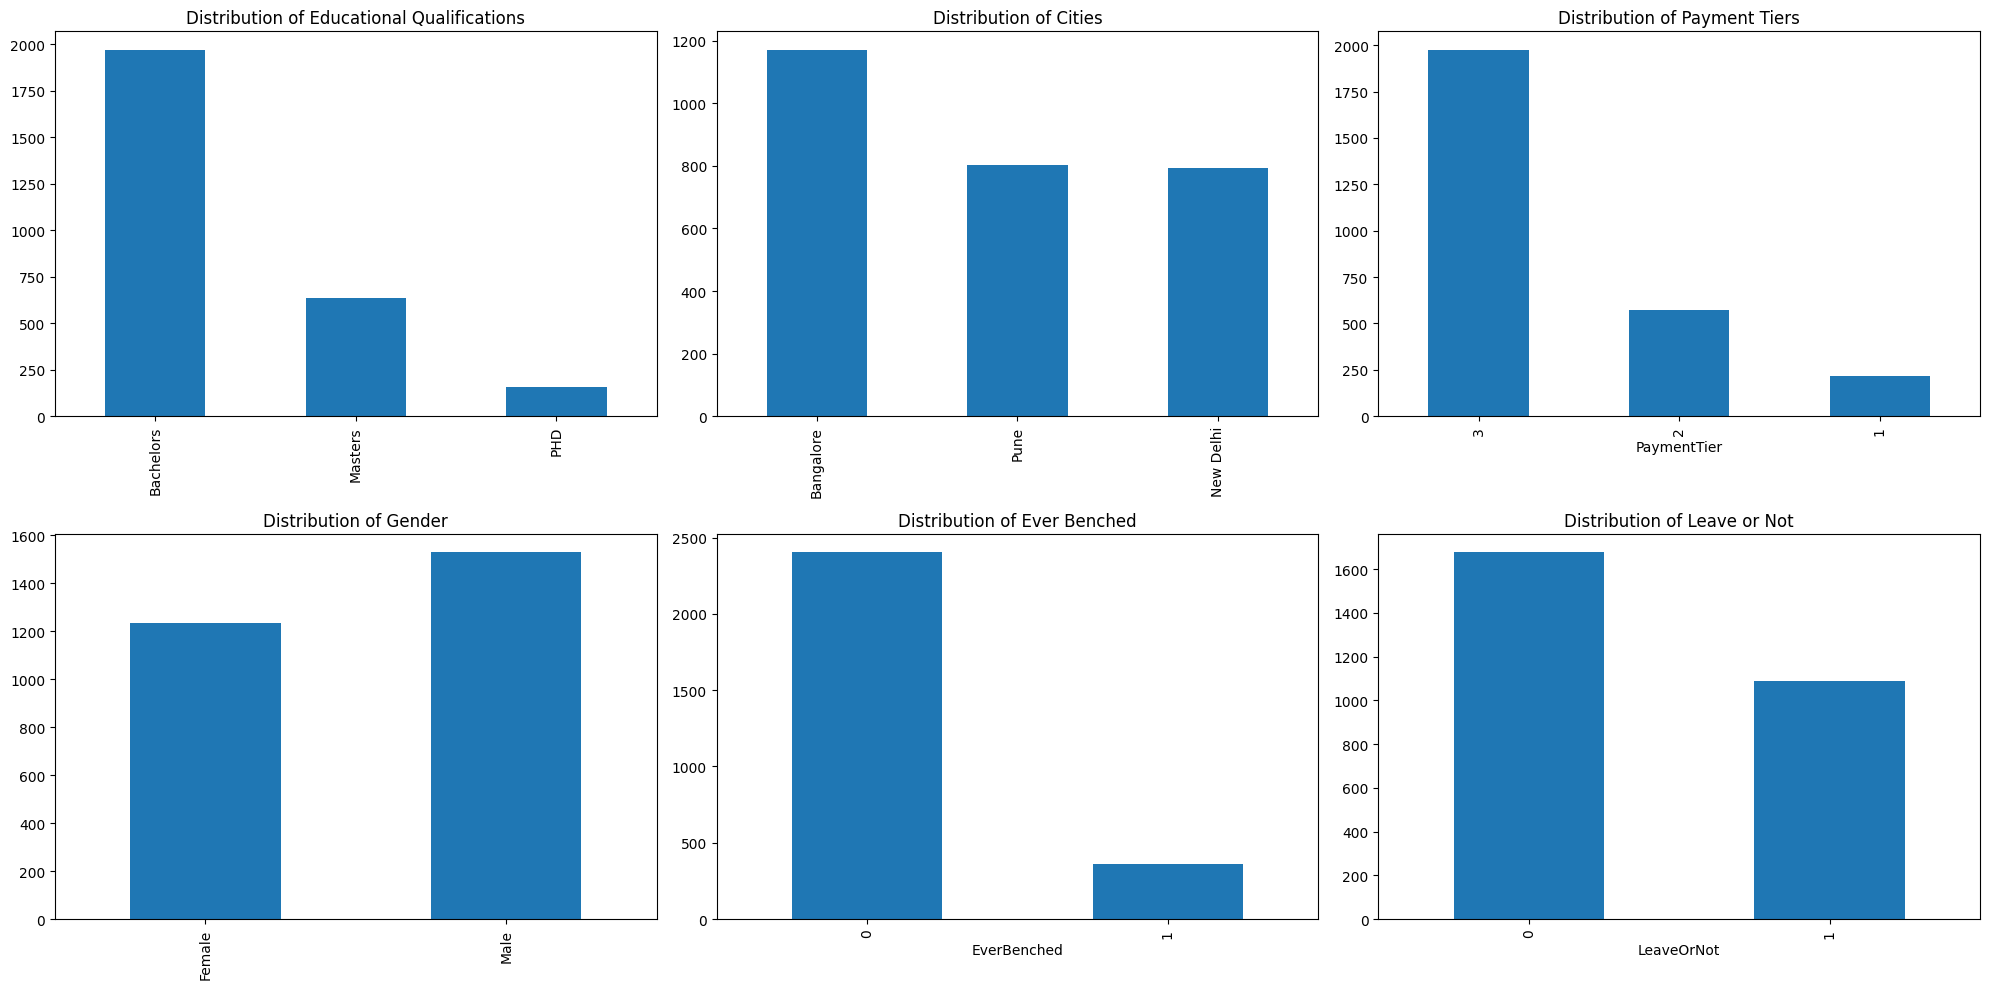

In [ ]:
# Categorical Feature Distribution Plots
plt.figure(figsize=(20, 10))

# Plot 1: Distribution of Bachelors, Masters, and PHD
plt.subplot(2, 3, 1)
df[['Bachelors', 'Masters', 'PHD']].sum().plot(kind='bar')
plt.title('Distribution of Educational Qualifications')

# Plot 2: Distribution of Cities (Bangalore, Pune, New Delhi)
plt.subplot(2, 3, 2)
df[['Bangalore', 'Pune', 'New Delhi']].sum().plot(kind='bar')
plt.title('Distribution of Cities')

# Plot 3: Distribution of PaymentTier
plt.subplot(2, 3, 3)
df['PaymentTier'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Tiers')

# Plot 4: Distribution of Gender (Female, Male)
plt.subplot(2, 3, 4)
df[['Female', 'Male']].sum().plot(kind='bar')
plt.title('Distribution of Gender')

# Plot 5: Distribution of EverBenched
plt.subplot(2, 3, 5)
df['EverBenched'].value_counts().plot(kind='bar')
plt.title('Distribution of Ever Benched')

# Plot 6: Distribution of LeaveOrNot
plt.subplot(2, 3, 6)
df['LeaveOrNot'].value_counts().plot(kind='bar')
plt.title('Distribution of Leave or Not')

plt.tight_layout()
plt.show()


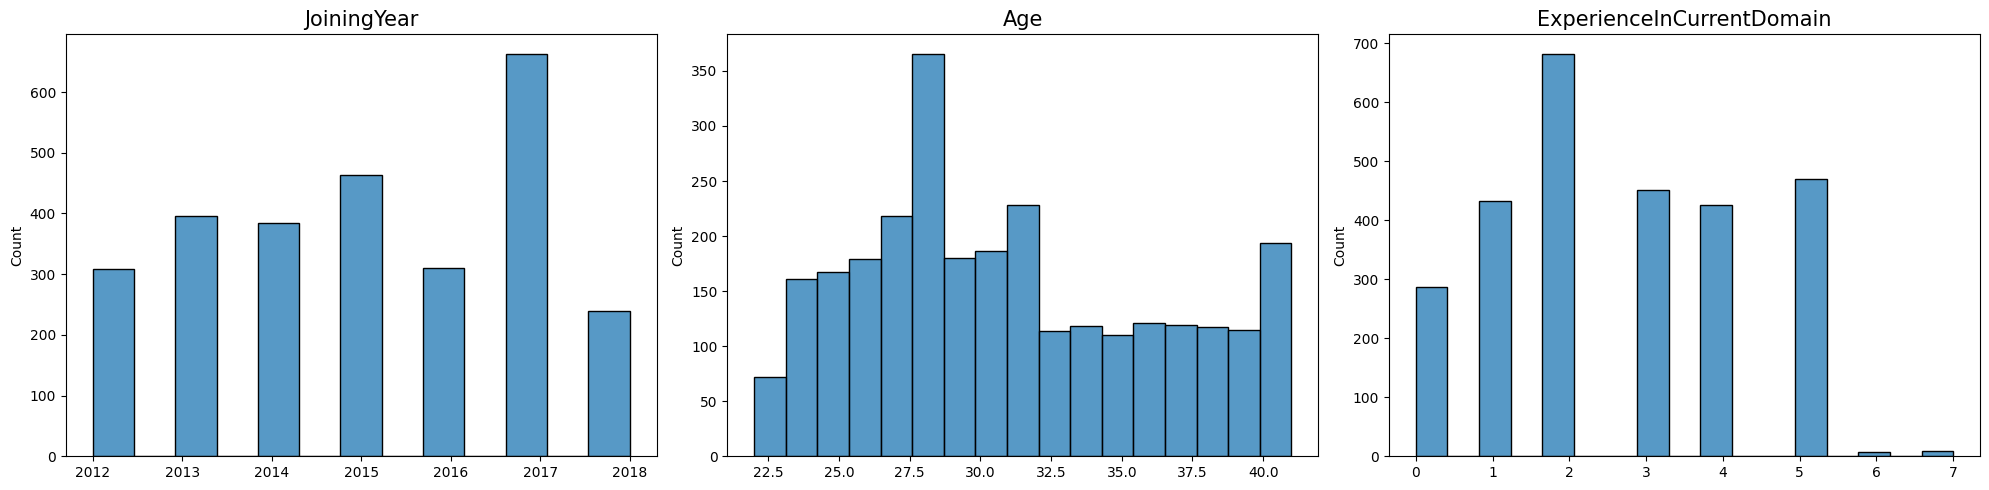

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 4 columns
numerical_features = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

for i, feature in enumerate(numerical_features):
    hist = sns.histplot(data=df, x=feature, ax=ax[i])
    hist.set_title(feature, fontsize=15)
    hist.set_xlabel('')

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()


In [ ]:
import plotly.express as ex
fig = ex.pie(df, names='LeaveOrNot', color_discrete_sequence=['green', 'orange'])  # Specify colors here
fig.update_layout(title='<b>LeaveOrNot<b>', width=600, height=500)
fig.show()

# Model implementation and evaluation

Importing the necessary librairies

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text
from sklearn.metrics import accuracy_score

Split the data into train and test sets 70 % for training and 30% for testing!

In [ ]:
X = df.drop(columns=['LeaveOrNot'])
Y = df['LeaveOrNot']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=42)

implementation of decision tree (dt)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

visualization of the decision tree (max depth 5 since the tree is too big)

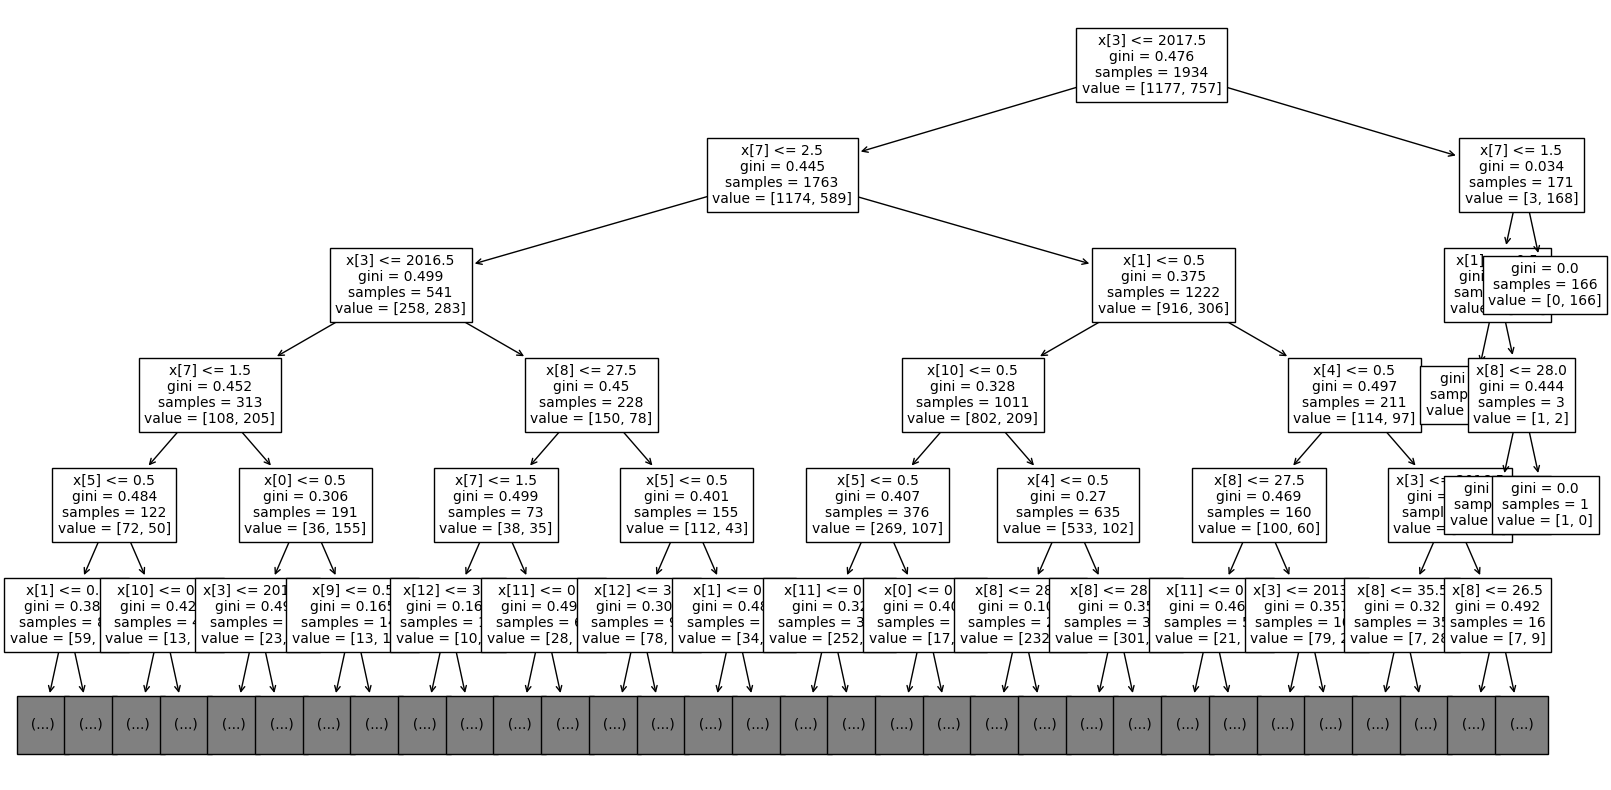

|--- feature_3 <= 2017.50
|   |--- feature_7 <= 2.50
|   |   |--- feature_3 <= 2016.50
|   |   |   |--- feature_7 <= 1.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_8 <= 24.50
|   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 2014.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  2014.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  24.50
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_12 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 31.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_8 >  31.00
|   |   |   |   |   |   |   |   |   |   |--- feature_

In [ ]:
# Visualize the decision tree
#depth is 5 because the tree is too big and can't be seen
plt.figure(figsize=(20, 10))
plot_tree(dt,max_depth=5,fontsize=10)
plt.show()

tree_text = export_text(dt)
print(tree_text)

The most relevant Features in the decision Tree

In [ ]:
# Get feature importances from the trained decision tree
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

Feature Importance:
                      Feature  Importance
3                 JoiningYear    0.304828
8                         Age    0.211466
12  ExperienceInCurrentDomain    0.112310
7                 PaymentTier    0.107516
5                        Pune    0.056980
1                     Masters    0.053968
4                   Bangalore    0.031788
10                       Male    0.030697
11                EverBenched    0.030083
9                      Female    0.020433
0                   Bachelors    0.020381
2                         PHD    0.011142
6                   New Delhi    0.008409


Accuracy over training set and testing set

In [ ]:
print("Model score on training set:", dt.score(X_train, Y_train))
print("Model score on the test set:", dt.score(X_test, Y_test))

Model score on training set: 0.9467425025853154
Model score on the test set: 0.6975903614457831


# Pre pruned descision tree

Grid search to set the best parameters for pre pruning

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2,7,1),
    'min_samples_split': range(2,15,1),
    'min_samples_leaf': range(1,15,1),
}
# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
dtp=DecisionTreeClassifier(criterion="entropy",max_depth=8,min_samples_leaf=2,min_samples_split=10,splitter="best")
dtp = dtp.fit(X_train,Y_train)

size of decision tree (with and without pruning)

In [ ]:
print(f"Decision tree height: {dt.get_depth()}")
print("number of nodes",(dt.tree_.node_count))
num_leaves = dt.get_n_leaves()
print(f"Number of leaves in the decision tree: {num_leaves}")
tree_height = dtp.get_depth()
print()
print(f"Pruned Decision tree height: {tree_height}")
print("number of nodes",(dtp.tree_.node_count))
num_leaves = dtp.get_n_leaves()
print(f"Number of leaves in the decision tree: {num_leaves}")

Decision tree height: 23
number of nodes 1195
Number of leaves in the decision tree: 598

Pruned Decision tree height: 8
number of nodes 173
Number of leaves in the decision tree: 87


Accuracy over training set and testing set

In [ ]:
print("Model score on training set:", dtp.score(X_train, Y_train))
print("Model score on the test set:", dtp.score(X_test, Y_test))

Model score on training set: 0.8407445708376422
Model score on the test set: 0.7987951807228916


# post pruned decision tree

In [ ]:
# Split the data into training, validation, and test sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.25, random_state=42)  # 20% validation, 60% training

# Train a decision tree classifier with maximum depth on the training set
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, Y_train)

# Prune the decision tree using cost-complexity pruning
path = decision_tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Choose the ccp_alpha value that yields the simplest tree based on the validation set performance
best_alpha = None
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    pruned_tree.fit(X_train, Y_train)
    accuracy = pruned_tree.score(X_val, Y_val)  # Evaluate on the validation set
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy

# Train the final pruned tree using the selected ccp_alpha value on the combined training and validation sets
final_pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_pruned_tree.fit(X_trainval, Y_trainval)


DecisionTreeClassifier(ccp_alpha=0.0023060172637977237, random_state=42)

Accuracy over training set and testing set and validation set

In [ ]:
print("Pruned Tree Accuracies:")
print("Training set:", final_pruned_tree.score(X_trainval, Y_trainval))
print("Test set:", final_pruned_tree.score(X_test, Y_test))
print("Validation set:", final_pruned_tree.score(X_val, Y_val))

Pruned Tree Accuracies:
Training set: 0.8218000904568069
Test set: 0.8119349005424955
Validation set: 0.8137432188065099


size of decision tree (with and without pruning)

In [ ]:
print(f"Decision tree height: {dt.get_depth()}")
print("number of nodes",(dt.tree_.node_count))
num_leaves = dt.get_n_leaves()
print(f"Number of leaves in the decision tree: {num_leaves}")
print()
tree_height = final_pruned_tree.get_depth()
print(f"Pruned Decision tree height: {tree_height}")
print("number of nodes",(final_pruned_tree.tree_.node_count))
num_leaves = final_pruned_tree.get_n_leaves()
print(f"Number of leaves in the decision tree: {num_leaves}")

Decision tree height: 23
number of nodes 1195
Number of leaves in the decision tree: 598

Pruned Decision tree height: 7
number of nodes 45
Number of leaves in the decision tree: 23


**combining pre and post pruning**

In [ ]:
# Train a decision tree classifier with pre-pruning
decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=8,min_samples_leaf=2,min_samples_split=10,splitter="best", random_state=42)
decision_tree.fit(X_train, Y_train)

# Prune the decision tree using cost-complexity pruning
path = decision_tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Choose the ccp_alpha value that yields the simplest tree based on the validation set performance
best_alpha = None
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    pruned_tree.fit(X_train, Y_train)
    accuracy = pruned_tree.score(X_val, Y_val)  # Evaluate on the validation set
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy

# Train the final pruned tree using the selected ccp_alpha value on the entire training dataset
final_pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
final_pruned_tree.fit(X_trainval, Y_trainval)

# Evaluate the final pruned tree on the test set
test_accuracy = final_pruned_tree.score(X_test, Y_test)
print("Model accuracy on test set:", test_accuracy)


Model accuracy on test set: 0.8119349005424955
